WORLD POPULATION ANALYSIS

Import libraries

In [ ]:
pip install plotly

In [ ]:
pip install joypy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.cluster import KMeans
import warnings
from joypy import joyplot

In [ ]:
warnings.filterwarnings("ignore")

Read the Dataset

In [ ]:
df = pd.read_csv('/content/world_population.csv')
print(df.head())
print(df.info())

   Rank CCA3 Country/Territory           Capital Continent  2022 Population  \
0    36  AFG       Afghanistan             Kabul      Asia         41128771   
1   138  ALB           Albania            Tirana    Europe          2842321   
2    34  DZA           Algeria           Algiers    Africa         44903225   
3   213  ASM    American Samoa         Pago Pago   Oceania            44273   
4   203  AND           Andorra  Andorra la Vella    Europe            79824   

   2020 Population  2015 Population  2010 Population  2000 Population  \
0         38972230         33753499         28189672         19542982   
1          2866849          2882481          2913399          3182021   
2         43451666         39543154         35856344         30774621   
3            46189            51368            54849            58230   
4            77700            71746            71519            66097   

   1990 Population  1980 Population  1970 Population  Area (km²)  \
0         10694796

In [ ]:
mv = df.isnull().sum()
print(mv)

Rank                           0
CCA3                           0
Country/Territory              0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64


In [ ]:
df.rename(columns={
    '2022 Population' : 'Population_2022',
    '2020 Population' : 'Population_2020',
    '2015 Population' : 'Population_2015',
    '2010 Population' : 'Population_2010',
    '2000 Population' : 'Population_2000',
    '1990 Population' : 'Population_1990',
    '1980 Population' : 'Population_1980',
    '1970 Population' : 'Population_1970',
    'Area (km²)' : 'Area_km2',
    'Density (per km²)' : 'Density_per_km2',
    'Growth Rate' : 'Growth_Rate',
    'World Population Percentage' : 'World_Population_Percentage'
}, inplace=True)
print(df.columns)

Index(['Rank', 'CCA3', 'Country/Territory', 'Capital', 'Continent',
       'Population_2022', 'Population_2020', 'Population_2015',
       'Population_2010', 'Population_2000', 'Population_1990',
       'Population_1980', 'Population_1970', 'Area_km2', 'Density_per_km2',
       'Growth_Rate', 'World_Population_Percentage'],
      dtype='object')


Calculate Population Changes

In [ ]:
df['Change_2022_2020'] = df['Population_2022'] - df['Population_2022']
df['Change_2020_2015'] = df['Population_2020'] - df['Population_2015']
df['Change_2015_2010'] = df['Population_2015'] - df['Population_2010']
print(df[['Country/Territory','Change_2022_2020','Change_2020_2015','Change_2015_2010']])

     Country/Territory  Change_2022_2020  Change_2020_2015  Change_2015_2010
0          Afghanistan                 0           5218731           5563827
1              Albania                 0            -15632            -30918
2              Algeria                 0           3908512           3686810
3       American Samoa                 0             -5179             -3481
4              Andorra                 0              5954               227
..                 ...               ...               ...               ...
229  Wallis and Futuna                 0              -527              -960
230     Western Sahara                 0             64224             78528
231              Yemen                 0           3767501           3772599
232             Zambia                 0           2679485           2456144
233           Zimbabwe                 0           1514729           1315166

[234 rows x 4 columns]


Calculate Growth Percentages

In [ ]:
df['Growth_percentage_2022_2020'] = (df['Change_2022_2020'] / df['Population_2020']) * 100
df['Growth_percentage_2020_2015'] = (df['Change_2020_2015']/ df['Population_2015']) * 100
df['Growth_percentage_2015_2010'] = (df['Change_2015_2010']/ df['Population_2010']) * 100
print(df[['Country/Territory','Growth_percentage_2022_2020','Growth_percentage_2020_2015','Growth_percentage_2015_2010']])

     Country/Territory  Growth_percentage_2022_2020  \
0          Afghanistan                          0.0   
1              Albania                          0.0   
2              Algeria                          0.0   
3       American Samoa                          0.0   
4              Andorra                          0.0   
..                 ...                          ...   
229  Wallis and Futuna                          0.0   
230     Western Sahara                          0.0   
231              Yemen                          0.0   
232             Zambia                          0.0   
233           Zimbabwe                          0.0   

     Growth_percentage_2020_2015  Growth_percentage_2015_2010  
0                      15.461304                    19.737112  
1                      -0.542311                    -1.061235  
2                       9.884169                    10.282169  
3                     -10.082152                    -6.346515  
4                  

Calculate Average Growth Rate Over Decades

In [ ]:
df['Average_Growth_Rate_2000_2022'] = (df['Population_2022'] - df['Population_2000']) / df['Population_2000'] * 100 / 22
print(df[['Country/Territory','Average_Growth_Rate_2000_2022']])

     Country/Territory  Average_Growth_Rate_2000_2022
0          Afghanistan                       5.020586
1              Albania                      -0.485255
2              Algeria                       2.086815
3       American Samoa                      -1.089488
4              Andorra                       0.943998
..                 ...                            ...
229  Wallis and Futuna                      -0.972813
230     Western Sahara                       5.137830
231              Yemen                       3.676613
232             Zambia                       4.653634
233           Zimbabwe                       1.722927

[234 rows x 2 columns]


Compute Cumulative Population Growth

In [ ]:
df['Cummulative_Growth_1970_2022'] = (df['Population_2022'] - df['Population_1970']) / df['Population_1970'] * 100
print(df[['Country/Territory', 'Cummulative_Growth_1970_2022']])

     Country/Territory  Cummulative_Growth_1970_2022
0          Afghanistan                    282.487510
1              Albania                     22.264511
2              Algeria                    225.482036
3       American Samoa                     63.519852
4              Andorra                    301.933535
..                 ...                           ...
229  Wallis and Futuna                     23.408340
230     Western Sahara                    654.194655
231              Yemen                    392.380904
232             Zambia                    367.520157
233           Zimbabwe                    213.680458

[234 rows x 2 columns]


In [ ]:
# Reshape the dataset to create a 'Year' column
df_melted = df.melt(
    id_vars=['Country/Territory'],
    value_vars=['Population_1970', 'Population_1980', 'Population_1990', 'Population_2000', 'Population_2010', 'Population_2015', 'Population_2020', 'Population_2022'],
    var_name='Year',
    value_name='Population'
)

# Clean the 'Year' column
df_melted['Year'] = df_melted['Year'].str.extract('(\d+)').astype(int)

# Check the reshaped dataset
print(df_melted.head())



  Country/Territory  Year  Population
0       Afghanistan  1970    10752971
1           Albania  1970     2324731
2           Algeria  1970    13795915
3    American Samoa  1970       27075
4           Andorra  1970       19860


Population Growth Over Time

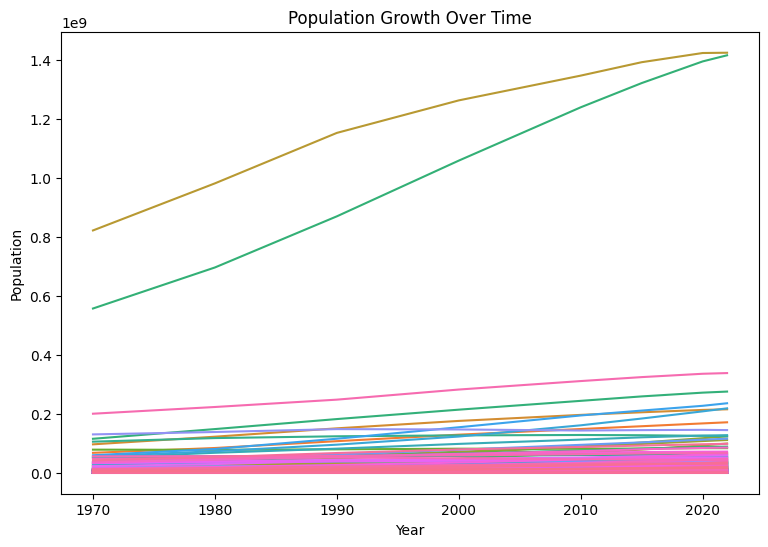

In [ ]:
plt.figure(figsize=(9, 6))
sns.lineplot(data=df_melted, x='Year', y='Population', hue='Country/Territory', legend=None)
plt.title('Population Growth Over Time')
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()

World Population Distribution (2022)

In [7]:
fig = px.choropleth(
    df,
    locations="CCA3",
    color="Population_2022",
    hover_name="Country/Territory",
    title="World Population Distribution (2022)",
    color_continuous_scale=px.colors.sequential.Plasma,
    width=800,
    height=500
)
fig.show()

NameError: name 'df' is not defined

Countries with Highest Growth Rates

In [ ]:
data_sorted = df.sort_values(by='Growth_Rate', ascending=False)

# Get the top 10 and bottom 10 countries
highest_growth = data_sorted.head(10)
lowest_growth = data_sorted.tail(10)


fig2 = px.bar(highest_growth,
              x='Country/Territory',
              y='Growth_Rate',
              title='Countries with Highest Growth Rates',
              template='plotly_dark',
              color='Growth_Rate',
              color_discrete_sequence=px.colors.diverging.Earth)

fig2.update_layout(paper_bgcolor='black',
                   plot_bgcolor='black',
                   width=800,
                   height=500)
fig2.show()

Countries with Lowest Growth Rates

In [ ]:
fig3 = px.bar(lowest_growth,
              x='Country/Territory',
              y='Growth_Rate',
              title='Countries with Lowest Growth Rates',
              template='plotly_dark',
              color='Growth_Rate',
              color_discrete_sequence=px.colors.sequential.Plasma)

fig3.update_layout(paper_bgcolor='black',
                   plot_bgcolor='black',
                   width=800,
                   height=500)
fig3.show()

Decade-Wise Population Changes

In [ ]:
decade_diff = df[['Country/Territory', 'Population_1970', 'Population_1980', 'Population_1990', 'Population_2000', 'Population_2010', 'Population_2020']]
decade_diff['1970-1980'] = decade_diff['Population_1980'] - decade_diff['Population_1970']
decade_diff['1980-1990'] = decade_diff['Population_1990'] - decade_diff['Population_1980']
decade_diff['1990-2000'] = decade_diff['Population_2000'] - decade_diff['Population_1990']
decade_diff['2000-2010'] = decade_diff['Population_2010'] - decade_diff['Population_2000']
decade_diff['2010-2020'] = decade_diff['Population_2020'] - decade_diff['Population_2010']

In [ ]:
fig = px.box(
    decade_diff.melt(id_vars=['Country/Territory'],
                     value_vars=['1970-1980', '1980-1990', '1990-2000', '2000-2010', '2010-2020'],
                     var_name='Decade',
                     value_name='Population Change'),

    x='Decade',
    y='Population Change',
    title='Decade-Wise Population Changes',
    template='plotly_dark',
    color='Decade',
    color_discrete_sequence=px.colors.sequential.Viridis
)

fig.update_layout(
    paper_bgcolor='black',
    plot_bgcolor='black',
    width=800,
    height=500
)

fig.show()


Population by Continent in 2022

In [ ]:
continent_population = df.groupby('Continent')['Population_2022'].sum().reset_index()

fig = px.pie(
    continent_population,
    names='Continent',
    values='Population_2022',
    title='Population by Continent in 2022',
    template='plotly_dark',
    color_discrete_sequence=px.colors.sequential.Plasma
)

fig.update_layout(
    paper_bgcolor='black',
    plot_bgcolor='black',
    width=800,
    height=500
)

fig.show()


Global Population Growth Rate by Country

In [ ]:
fig = px.choropleth(
    df,
    locations='CCA3',
    color='Growth_Rate',
    hover_name='Country/Territory',
    title='Global Population Growth Rate by Country',
    color_continuous_scale=px.colors.sequential.Plasma,
    template='plotly_dark'
)

fig.update_layout(
    paper_bgcolor='black',
    plot_bgcolor='black',
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    ),
    width=800,
    height=500
)

fig.show()


Area and population density

In [ ]:
fig = px.scatter(df, x="Population_2000", y="Growth_Rate",
                 size="Population_2000", color="Country/Territory",
                 log_x=True, size_max=50,
                 template='plotly_dark',
                 title="Area and population density",
                 marginal_y='rug',
                 width=800,
                 height=500)
fig.show()



Number of Countries by Continent

In [ ]:
continent_counts = df['Continent'].value_counts().reset_index()
continent_counts.columns = ['Continent', 'Number of Countries']

fig = px.bar(
    continent_counts,
    x='Continent',
    y='Number of Countries',
    title='Number of Countries by Continent',
    text='Number of Countries',
    template='plotly_dark',
    color='Continent',
)

fig.update_layout(
    paper_bgcolor='black',
    plot_bgcolor='black',
    xaxis_title='Continent',
    yaxis_title='Number of Countries',
    width=800,
    height=500
)

fig.show()


Top 10 Countries with the Most Population in 2022

In [ ]:
df_grouped = df.groupby('Country/Territory', as_index=False)['Population_2022'].sum()

df_sorted = df_grouped.sort_values(by='Population_2022', ascending=False)

top_10_most = df_sorted.head(10)

fig = px.bar(
    top_10_most,
    x='Country/Territory',
    y='Population_2022',
    title='Top 10 Countries with the Most Population in 2022',
    color='Population_2022',
    text='Population_2022',
    template='plotly_dark'

)

fig.update_layout(
    xaxis_title='Country',
    yaxis_title='Population (2022)',
    paper_bgcolor='black',
    plot_bgcolor='black',
    width=800,
    height=500
)

fig.show()

Top 10 Countries with the Least Population in 2022

In [ ]:
df_sorted = df_grouped.sort_values(by='Population_2022', ascending=True)

top_10_least = df_sorted.head(10)

fig = px.bar(
    top_10_least,
    x='Country/Territory',
    y='Population_2022',
    title='Top 10 Countries with the Least Population in 2022',
    color='Population_2022',
    text='Population_2022',
    template='plotly_dark'
)

fig.update_layout(
    xaxis_title='Country',
    yaxis_title='Population (2022)',
    paper_bgcolor='black',
    plot_bgcolor='black',
    width=800,
    height=500
)

fig.show()

Density Comparison

In [ ]:
df_size_scale = pd.DataFrame(df[['Country/Territory','Area_km2','Density_per_km2','Growth_Rate','Population_2022']])
df_size_scale['Size Category'] = ['Small' if x < 5000 else 'Large' for x in df_size_scale['Area_km2']]

In [ ]:
fig = px.box(df_size_scale,
              x='Size Category',
              y='Density_per_km2',
              title='Density Comparison: Small vs. Large Countries',
              template='plotly_dark',
              color='Size Category')

fig.update_layout(title_font_color='white',
                   paper_bgcolor='black',
                   font_color='white',
                   width=800,
                   height=500
                  )
fig.show()

World Population Growth (1970-2020)

In [ ]:
world_population = df[['Population_1970', 'Population_1980', 'Population_1990',
                       'Population_2000', 'Population_2010', 'Population_2020']].sum()

world_population_df = pd.DataFrame({
    'Year': ['1970', '1980', '1990', '2000', '2010', '2020'],
    'Population': world_population.values
})


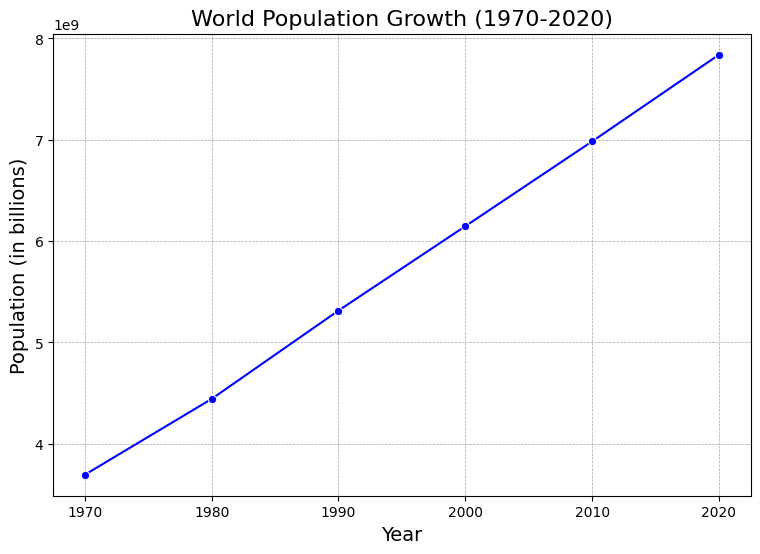

In [ ]:
plt.figure(figsize=(9, 6))
sns.lineplot(data=world_population_df, x='Year', y='Population', marker='o', color='blue')
plt.title('World Population Growth (1970-2020)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Population (in billions)', fontsize=14)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

plt.show()

The Fastest Growing Countries

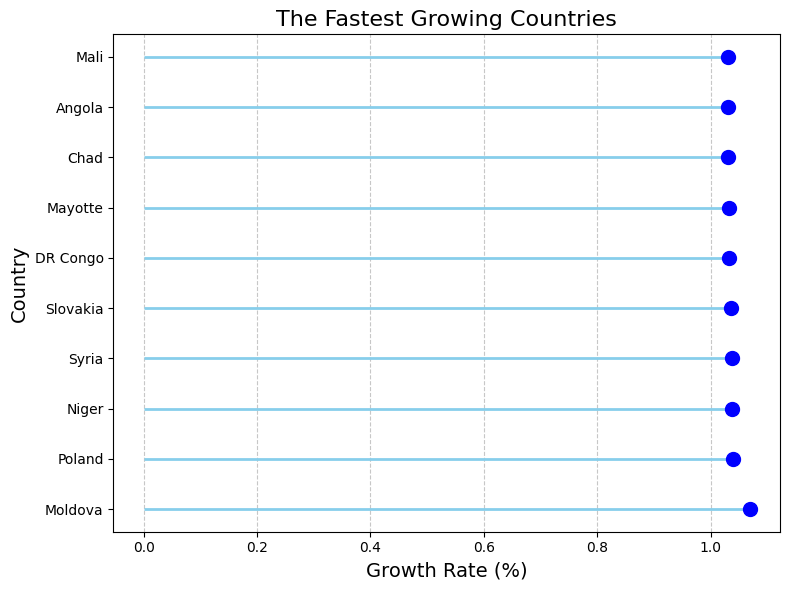

In [ ]:
fastest_growing = df.sort_values(by='Growth_Rate', ascending=False).head(10)

plt.figure(figsize=(8, 6))

plt.hlines(
    y=fastest_growing['Country/Territory'],
    xmin=0,
    xmax=fastest_growing['Growth_Rate'],
    color='skyblue',
    linewidth=2
)

plt.scatter(
    fastest_growing['Growth_Rate'],
    fastest_growing['Country/Territory'],
    color='blue',
    s=100,
    zorder=3
)

plt.title('The Fastest Growing Countries', fontsize=16)
plt.xlabel('Growth Rate (%)', fontsize=14)
plt.ylabel('Country', fontsize=14)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

Slowest Growing Countries

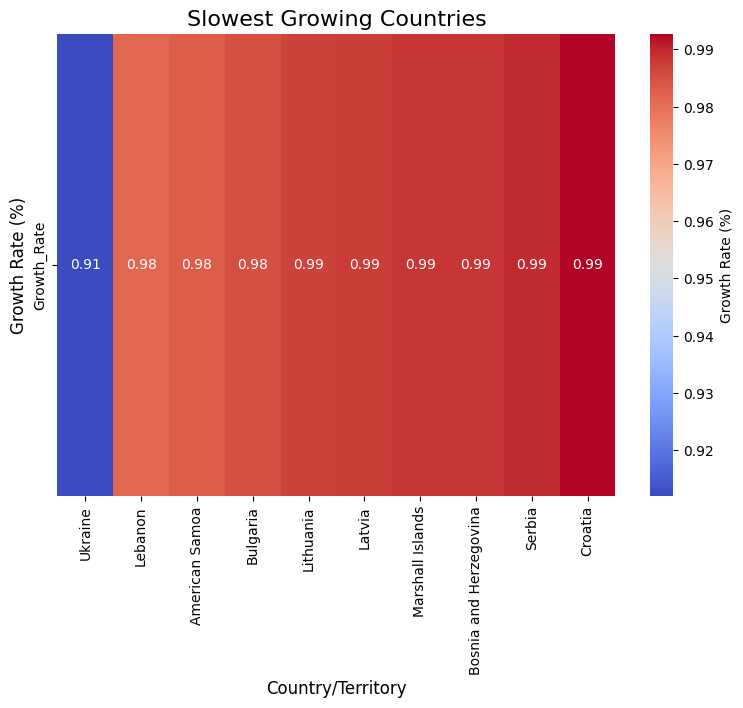

In [ ]:
slowest_growing = df.sort_values(by='Growth_Rate', ascending=True).head(10)

plt.figure(figsize=(9, 6))
sns.heatmap(
    slowest_growing[['Country/Territory', 'Growth_Rate']].set_index('Country/Territory').T,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={'label': 'Growth Rate (%)'}
)
plt.title('Slowest Growing Countries', fontsize=16)
plt.xlabel('Country/Territory', fontsize=12)
plt.ylabel('Growth Rate (%)', fontsize=12)
plt.show()


Top 10 Countries with Most and Least Land Area

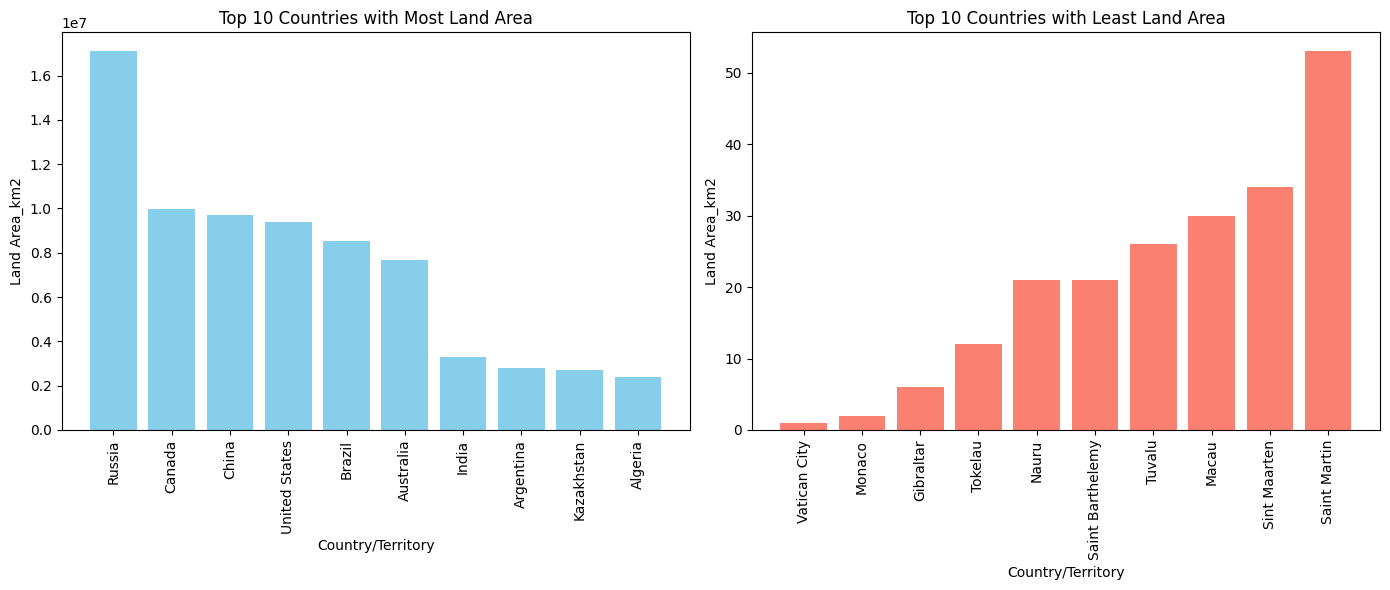

In [ ]:
most_land_area = df.sort_values(by='Area_km2', ascending=False).head(10)
least_land_area = df.sort_values(by='Area_km2', ascending=True).head(10)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].bar(most_land_area['Country/Territory'], most_land_area['Area_km2'], color='skyblue')
axes[0].set_title('Top 10 Countries with Most Land Area')
axes[0].set_xlabel('Country/Territory')
axes[0].set_ylabel('Land Area_km2')
axes[0].tick_params(axis='x', rotation=90)

axes[1].bar(least_land_area['Country/Territory'], least_land_area['Area_km2'], color='salmon')
axes[1].set_title('Top 10 Countries with Least Land Area')
axes[1].set_xlabel('Country/Territory')
axes[1].set_ylabel('Land Area_km2')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

Top 10 Countries by Land Area Per Person (2022)

In [ ]:
df['Land_Area_Per_Person'] = df['Area_km2'] / df['Population_2022']

land_area_per_person_sorted = df.sort_values(by='Land_Area_Per_Person', ascending=False).head(10)

fig = px.bar(
    land_area_per_person_sorted,
    x='Country/Territory',
    y='Land_Area_Per_Person',
    title='Top 10 Countries by Land Area Per Person (2022)',
    template='plotly_dark',
    color='Country/Territory',
    labels={'Land_Area_Per_Person': 'Land Area Per Person (km²)', 'Country/Territory': 'Country'}
)

fig.update_layout(
    xaxis_title="Country/Territory",
    yaxis_title="Land Area Per Person (km²)",
    paper_bgcolor='black',
    plot_bgcolor='black',
    showlegend=False,
    width=800,
    height=500
)

fig.show()

World Population by Continent (2010-2022)

In [ ]:
population_by_continent = df.groupby('Continent')[['Population_2010', 'Population_2015', 'Population_2020', 'Population_2022']].sum()

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=['Population by Continent (2010)', 'Population by Continent (2015)',
                    'Population by Continent (2020)', 'Population by Continent (2022)'],
    specs=[[{'type': 'pie'}, {'type': 'pie'}], [{'type': 'pie'}, {'type': 'pie'}]]
)

fig.add_trace(go.Pie(labels=population_by_continent.index, values=population_by_continent['Population_2010'], name='2010'),
              row=1, col=1)
fig.add_trace(go.Pie(labels=population_by_continent.index, values=population_by_continent['Population_2015'], name='2015'),
              row=1, col=2)
fig.add_trace(go.Pie(labels=population_by_continent.index, values=population_by_continent['Population_2020'], name='2020'),
              row=2, col=1)
fig.add_trace(go.Pie(labels=population_by_continent.index, values=population_by_continent['Population_2022'], name='2022'),
              row=2, col=2)

fig.update_layout(
    height=600,
    title_text="World Population by Continent (2010-2022)",
    template='plotly_dark',
    showlegend=True,
    paper_bgcolor='black',
    plot_bgcolor='black',
    width=800
)

fig.show()


Prepare the Dataset for Prediction

In [ ]:
df_predict = df[['Population_1970', 'Population_1980', 'Population_1990', 'Population_2000', 'Population_2010', 'Population_2015', 'Population_2020', 'Population_2022']]
features = ['Population_1970', 'Population_1980', 'Population_1990', 'Population_2000', 'Population_2010', 'Population_2015', 'Population_2020']
x = df_predict[features]
y = df_predict['Population_2022']



Split the Dataset

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 42)
print("Training data:", x_train.shape)
print("Testing data:", x_test.shape)

Training data: (187, 7)
Testing data: (47, 7)


Train the Linear Regression Model

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)
print("Model coefficients:", model.coef_)

Model coefficients: [-0.04164925  0.08594581 -0.03219461 -0.03771036  0.11722488 -0.63135566
  1.53149446]


Evaluate the Model

In [ ]:
y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 224905.05391687338
Mean Squared Error (MSE): 377461288652.4214
R-squared (R²): 0.999884501355176


Visualize the Prediction

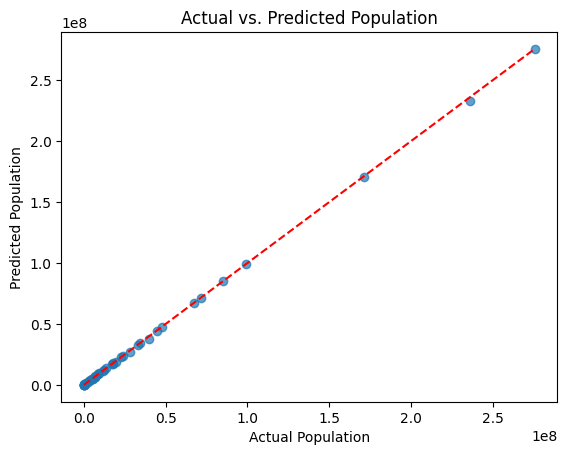

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'red', linestyle = '--')
plt.xlabel('Actual Population')
plt.ylabel('Predicted Population')
plt.title('Actual vs. Predicted Population')
plt.show()